# Usage: quickest tour

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lisphilar/covid19-sir/blob/master/example/usage_quickest.ipynb)

Thank you for using CovsirPhy!!  
This is the quickest tour to get an overview of CovsirPhy.

- Download datasets
- Parameter estimation with phase-dependent SIR-derived models
- Simulate the number of cases

## Preparation
Prepare the packages.

In [1]:
# change working directory
import os
os.chdir('C:\Xin\work\github\covid19-sir')
os.getcwd()

'C:\\Xin\\work\\github\\covid19-sir'

In [10]:
# install missing modules
# %pip install country-converter
# %pip install geopandas
# %pip install japanmap

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy<2.0.0,>=1.18.2 in c:\software\anaconda3\envs\covid\lib\site-packages (from japanmap) (1.21.4)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\software\\anaconda3\\envs\\covid\\lib\\site-packages\\~il\\_imaging.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
# !pip install covsirphy --upgrade
from pprint import pprint
import covsirphy as cs
cs.__version__

'2.22.2-alpha'

## Dataset preparation
Download the datasets to "../input" directory and load them.
If "../input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Please refer to [Usage: datasets](https://lisphilar.github.io/covid19-sir/usage_dataset.html) for the details.

In [3]:
# Standard users and developers
data_loader = cs.DataLoader("../input")
# The number of cases and population values
jhu_data = data_loader.jhu()

Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan
Retrieving datasets from COVID-19 Data Hub https://covid19datahub.io/
	Please set verbose=2 to see the detailed citation list.
Retrieving datasets from Our World In Data https://github.com/owid/covid-19-data/
Retrieving datasets from COVID-19 Open Data by Google Cloud Platform https://github.com/GoogleCloudPlatform/covid-19-open-data


We can select the following countries.

In [4]:
pprint(jhu_data.countries(), compact=True)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
 'Bolivia', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France',
 'French Guiana', 'French Polynesia', 'Gabo

## Start scenario analysis
As an example, we will analysis the number of cases in Italy using `Scenario` class. To initialize this class, we need to specify the country name.

In [4]:
snl = cs.Scenario(country="Italy", province=None)
snl.register(jhu_data)

## Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot. Some kind of complement will be done for analysis, if necessary.

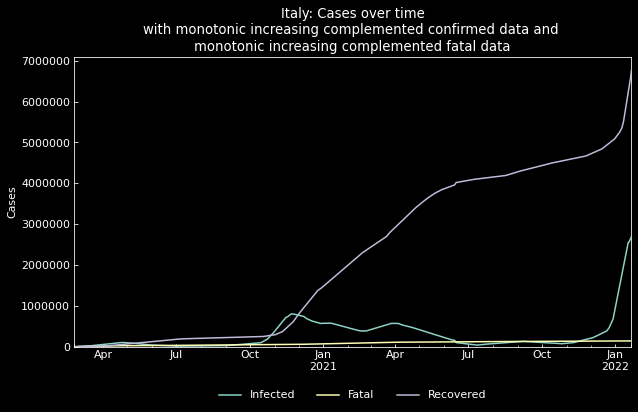

,Date,Infected,Fatal,Recovered
693,2022-01-17,2555278,141391,6093633
694,2022-01-18,2562156,141825,6314444
695,2022-01-19,2626590,142205,6450596
696,2022-01-20,2682041,142590,6593625
697,2022-01-21,2695703,142963,6765190


In [7]:
df = snl.records()
df.tail()

## S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. This is a significant step of analysis because we assume that ODE parameter values will be changed phase by phase (not daily basis, not constant through the outbreak).  
Details will be explained in [Usage: phases](https://lisphilar.github.io/covid19-sir/usage_phases.html).

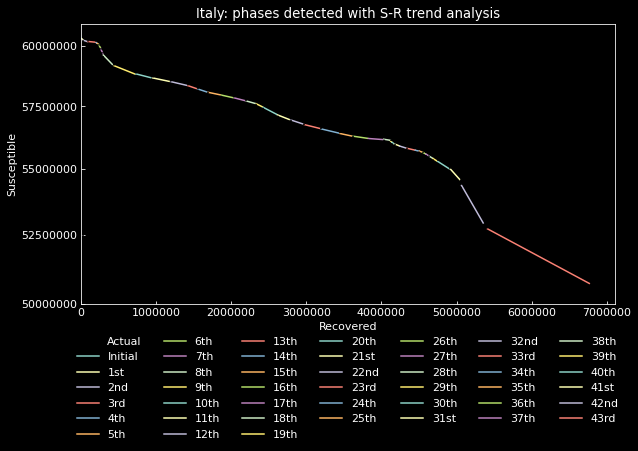

In [8]:
_ = snl.trend()

Summarize the phases.

- Type: "Past" or "Future"
- Start: start date of the phases
- End: end date of the phases
- Population: total population in the phases

In [9]:
snl.summary()

,Type,Start,End,Population
0th,Past,24Feb2020,22Mar2020,60421760
1st,Past,23Mar2020,10Apr2020,60421760
2nd,Past,11Apr2020,05May2020,60421760
3rd,Past,06May2020,26Aug2020,60421760
4th,Past,27Aug2020,21Sep2020,60421760
5th,Past,22Sep2020,09Oct2020,60421760
6th,Past,10Oct2020,24Oct2020,60421760
7th,Past,25Oct2020,02Nov2020,60421760
8th,Past,03Nov2020,15Nov2020,60421760
9th,Past,16Nov2020,28Nov2020,60421760


## Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage: SIR-derived models](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [ ]:
# Default value of timeout is 180 sec
snl.estimate(cs.SIRF, timeout=30)

## History of reproduction number
Let's see the history of parameter values. Reproduction number is here.

In [ ]:
_ = snl.history(target="Rt")

## History of parameters
History of each parameter. Values will be divided by the values in 0th phase.

In [ ]:
_ = snl.history_rate()

## Simulate the number of cases
How many cases will be in 30 days if the parameter values will not be changed from today?

In [ ]:
# Add a phase with 30 days from the date of the last record
snl.add(days=30)
_ = snl.simulate()

Next, please see [Usage: scenario analysis](https://lisphilar.github.io/covid19-sir/usage_quick.html) to find details of datasets and how to perform scenario analysis.  
Thank you!